<a href="https://colab.research.google.com/github/nikhild1111/DSBDA/blob/main/B2heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
df=pd.read_csv('/content/heart.csv',sep=',')
data=pd.read_csv('/content/heart.csv',sep=',')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [57]:
# Change data type from float64 to float32 for Space Complexity
df['age'] = df['age'].astype('int32')
df['sex'] = df['sex'].astype('int32')
df['trtbps'] = df['trtbps'].astype('int32')
df['chol'] = df['chol'].astype('int32')
df['fbs'] = df['fbs'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int32  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int32  
 4   chol      303 non-null    int32  
 5   fbs       303 non-null    int32  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 27.4 KB


In [58]:
df=df.drop_duplicates()

In [59]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [61]:
percent_missing.sort_values(ascending=False)

,0
age,0.0
sex,0.0
cp,0.0
trtbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalachh,0.0
exng,0.0
oldpeak,0.0


In [62]:
df = df.drop('fbs', axis=1)

In [63]:
# df.fbs.unique()

In [64]:
data.dropna(inplace=True)

In [88]:
for col in df.columns:
  if df[col].dtype == 'object' or df[col].dtype == 'string':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())

In [89]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
restecg,0
thalachh,0
exng,0
oldpeak,0
slp,0


In [67]:
subSet1 = df[['age','cp','chol','thalachh']]

In [68]:
subSet2 = df[['exng','slp','output']]

In [69]:
concatenated_df = pd.concat([subSet1, subSet2], axis=1)
concatenated_df

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,37,2,250,187,0,0,1
2,41,1,204,172,0,2,1
3,56,1,236,178,0,2,1
4,57,0,354,163,1,2,1
...,...,...,...,...,...,...,...
298,57,0,241,123,1,1,0
299,45,3,264,132,0,1,0
300,68,0,193,141,0,1,0
301,57,0,131,115,1,1,0


In [70]:
merged_df = subSet1.merge(right=subSet2,how='cross')
merged_df.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,63,3,233,150,0,0,1
2,63,3,233,150,0,2,1
3,63,3,233,150,0,2,1
4,63,3,233,150,1,2,1


In [71]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    threshold = 1.5 * IQR       # Define the threshold for outliers (1.5 times the IQR)
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)  # Identify outliers
    return column[~outlier_mask]  # Return the column with outliers removed

In [72]:
for col in df.columns:
    # Check if the column is numeric (int or float)
    if df[col].dtype in ['int64', 'int32']:
        df[col] = remove_outliers(df[col])

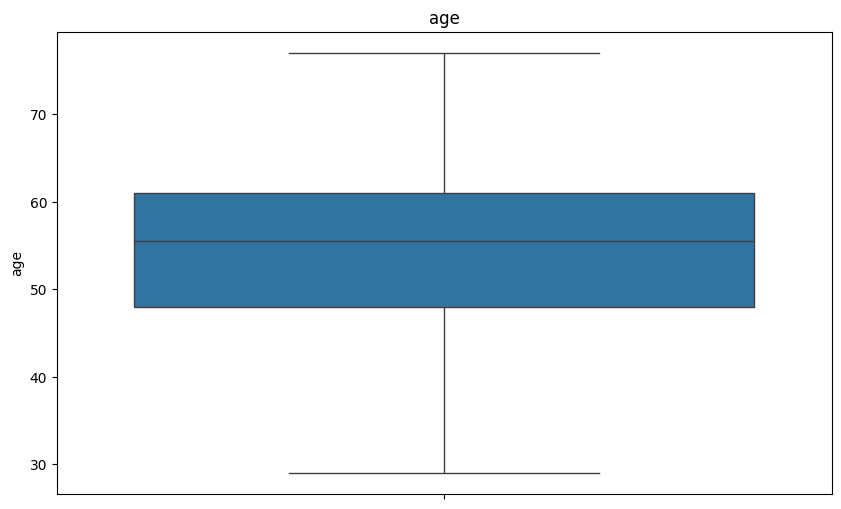

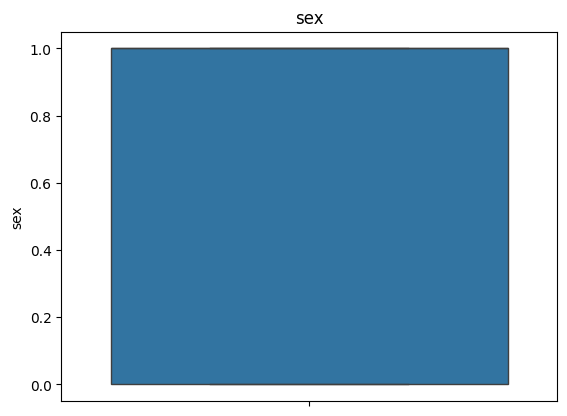

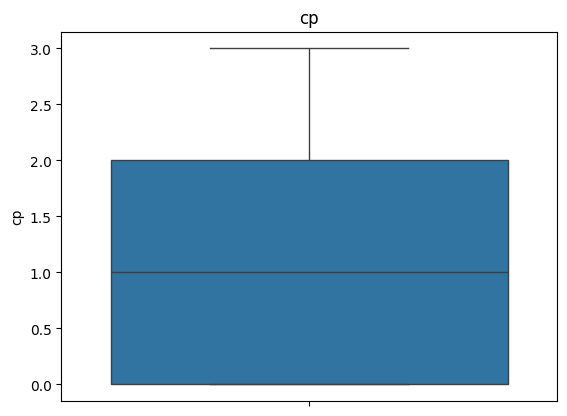

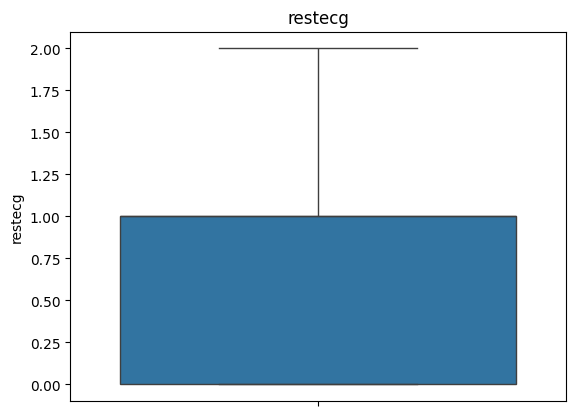

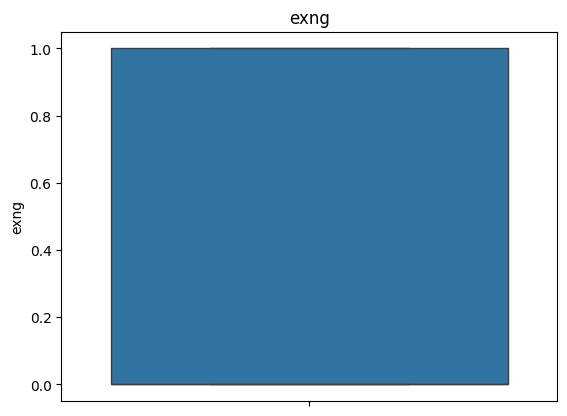

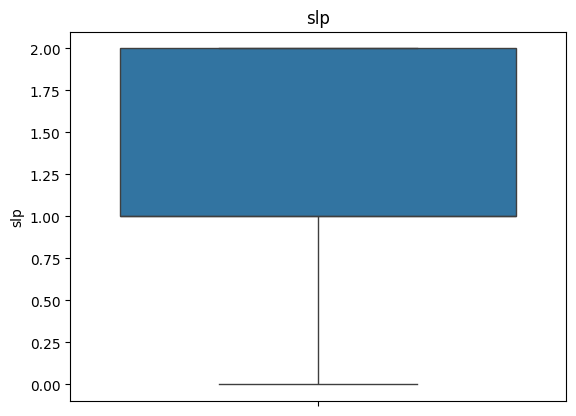

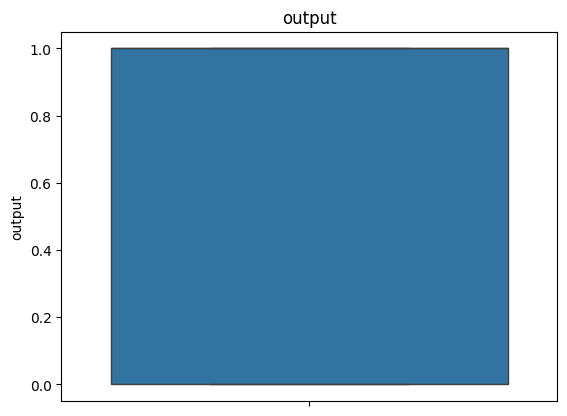

In [73]:
plt.figure(figsize=(10, 6)) # Set figure size (width=10, height=6)

for col in df.columns:
    # Check if the column is numeric (int or float)
    if df[col].dtype in ['int64', 'int32']:
     sns.boxplot(data=df[col])    # Create a boxplot for the column
     plt.title(col)               # Set title as column name
     plt.show()                   # Show each plot

In [74]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

Correlation with the Target:
age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.122410
chol       -0.112667
restecg     0.134874
thalachh    0.416569
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.453130
thall      -0.364247
Name: output, dtype: float64



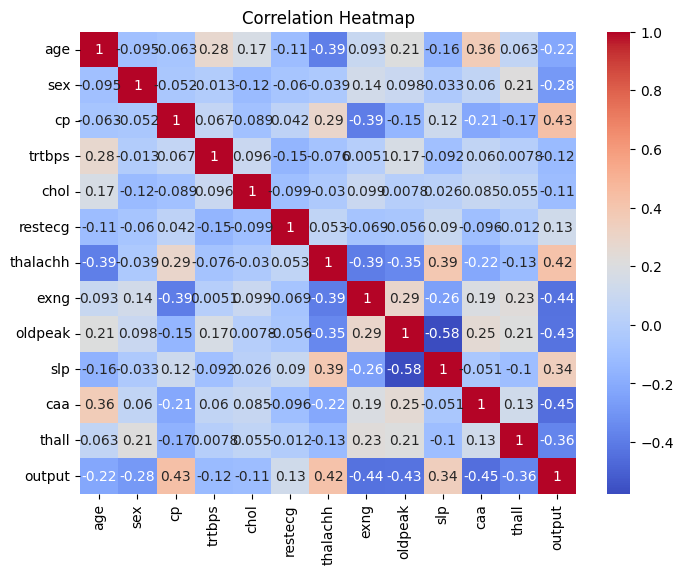

In [75]:
# Compute correlations between features and target
correlations = df.corr()['output'].drop('output')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
# Check for NaN values in the entire dataset
print(df.isnull().sum())
data.dropna(inplace=True)
# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])  # For categorical columns (mode)
    else:
        df[col] = df[col].fillna(df[col].mean())    # For numerical columns (mean)

        df = df.dropna()


age         0
sex         0
cp          0
trtbps      0
chol        0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [104]:
# splitting data using train test split
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((241, 6), (61, 6), (241,), (61,))

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

What it does:
Scales data to have mean = 0 and standard deviation = 1 (like a normal bell curve).

In [106]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with mode (most frequent value) for categorical
    else:
        df[col] = df[col].fillna(df[col].mean())    # Fill with mean for numeric


In [107]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
restecg,0
thalachh,0
exng,0
oldpeak,0
slp,0


In [108]:
y_train= np.array(y_train).reshape(-1, 1)
y_test= np.array(y_test).reshape(-1, 1)
y_train.shape

(241, 1)

In [109]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9016393442622951


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Function to evaluate classification model performance
def evaluate_classification_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1-Score
    cm = confusion_matrix(y_true, y_pred)  # Confusion Matrix

    print(f"\n{name} Model:")
    print(f" Accuracy     : {accuracy*100:.2f}%")
    print(f" Precision    : {precision:.4f}")
    print(f" Recall       : {recall:.4f}")
    print(f" F1-Score     : {f1:.4f}")
    print(f" Confusion Matrix:\n{cm}")

# Evaluate Logistic Regression Model
evaluate_classification_model("Logistic Regression", y_test, y_pred)


Logistic Regression Model:
 Accuracy     : 90.16%
 Precision    : 0.9118
 Recall       : 0.9118
 F1-Score     : 0.9118
 Confusion Matrix:
[[24  3]
 [ 3 31]]


1. Accuracy
Accuracy is the proportion of correct predictions made by the model out of all the predictions.

Accuracy
=
True Positives
+
True Negatives
Total Predictions
Accuracy=
Total Predictions
True Positives+True Negatives
​

Where:

True Positives (TP): Correctly predicted positive cases.

True Negatives (TN): Correctly predicted negative cases.

False Positives (FP): Incorrectly predicted positive cases.

False Negatives (FN): Incorrectly predicted negative cases.

2. Precision
Precision is the proportion of correctly predicted positive observations out of all predicted positive observations.

Precision
=
True Positives
True Positives
+
False Positives
Precision=
True Positives+False Positives
True Positives
​

Where:

True Positives (TP): Correctly predicted positive cases.

False Positives (FP): Incorrectly predicted positive cases.

3. Recall (Sensitivity or True Positive Rate)
Recall is the proportion of actual positive cases that were correctly identified by the model.

Recall
=
True Positives
True Positives
+
False Negatives
Recall=
True Positives+False Negatives
True Positives
​

Where:

True Positives (TP): Correctly predicted positive cases.

False Negatives (FN): Incorrectly predicted negative cases.

4. F1-Score
The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall, making it useful when you need to balance the two.

F1-Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1-Score=2×
Precision+Recall
Precision×Recall
​

5. Confusion Matrix
The confusion matrix is a table that displays the performance of the model by comparing the actual and predicted values. It shows how many of each type of prediction (TP, FP, TN, FN) the model made.


Predicted Positive (P)	Predicted Negative (N)
Actual Positive (P)	True Positive (TP)	False Negative (FN)
Actual Negative (N)	False Positive (FP)	True Negative (TN)
Where:

True Positives (TP): Correctly predicted positive cases.

False Positives (FP): Incorrectly predicted positive cases.

True Negatives (TN): Correctly predicted negative cases.

False Negatives (FN): Incorrectly predicted negative cases.

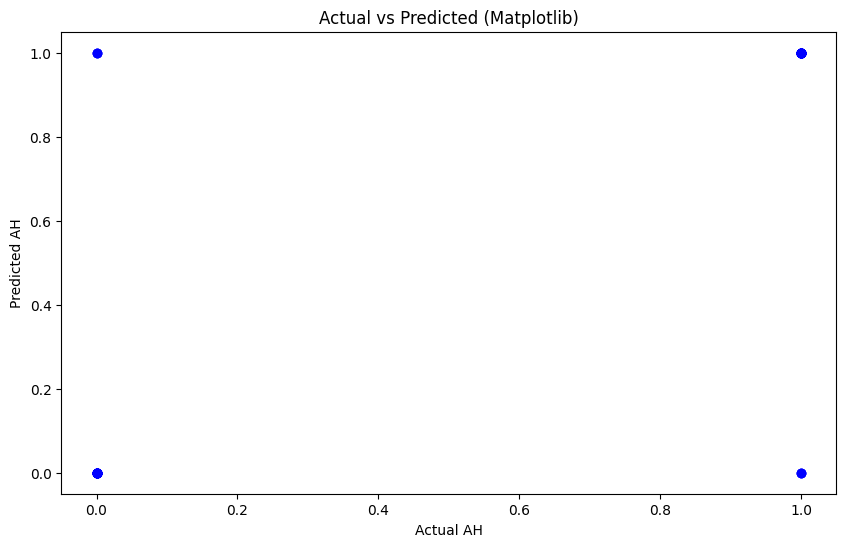

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, color='blue')
# plt.plot([0,1], [0,1], 'r--')  # Diagonal line
plt.xlabel('Actual AH')
plt.ylabel('Predicted AH')
plt.title('Actual vs Predicted (Matplotlib)')
plt.show()

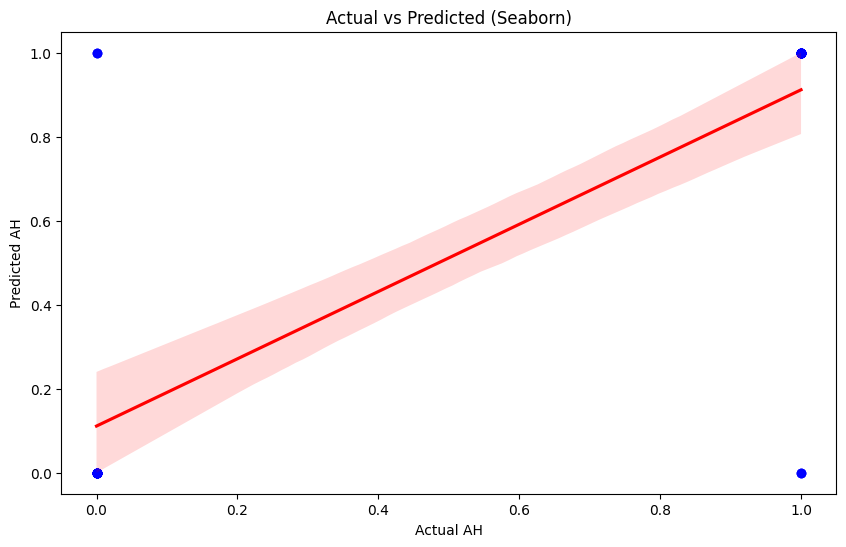

In [115]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Actual AH')
plt.ylabel('Predicted AH')
plt.title('Actual vs Predicted (Seaborn)')
plt.show()